In [11]:
import geopandas
from datetime import datetime
import matplotlib.pyplot as plt

In [12]:
data = geopandas.read_file("../resourses/example_dataset.geojson")
data = data.to_crs(epsg=32635)

In [13]:
dates_count = 0
date_format = '%Y-%m-%d'
april_int = 4

for date_str in data['sowing_date'].tolist():
    date = datetime.strptime(date_str, date_format)
    
    if date.month != april_int:
        dates_count += 1
        
print(f'Кількість полів, які були засіяні не у квітні: {dates_count}')

Кількість полів, які були засіяні не у квітні: 421


In [14]:
data['mistake'] = abs((data['actual_yield'] - data['model_yield']) / data['actual_yield'])
data.head(1)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,mistake
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((584923.210 5452025.816, 584932...",0.171447


In [15]:
min_mistake_field = data.loc[data['mistake'].idxmin()]
max_mistake_field = data.loc[data['mistake'].idxmax()]

print(f'Мінімальна похибка:\n{min_mistake_field}\n', end = '\n')
print(f'Максимальна похибка:\n{max_mistake_field}', end = '\n')

Мінімальна похибка:
crop_name                                                        soy
sowing_date                                               2018-05-09
actual_yield                                                  2600.0
field_id                                               KI_VN_10_0702
avg_temperature                                            13.084752
avg_rainfall                                              633.554513
model_yield                                                   2603.0
geometry           MULTIPOLYGON (((623340.4958060379 5466823.3236...
mistake                                                     0.001154
Name: 991, dtype: object

Максимальна похибка:
crop_name                                                       maiz
sowing_date                                               2017-04-28
actual_yield                                                  1500.0
field_id                                                KI_VN_08_405
avg_temperature                     

In [16]:
data['centroid'] = data['geometry'].centroid.apply(lambda x: f'POINT({x.x}, {x.y})')
data.head(1)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,mistake,centroid
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((584923.210 5452025.816, 584932...",0.171447,"POINT(584740.7802304118, 5451777.369353103)"


In [17]:
data['area(m²)'] = data.area
data.head(1)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,mistake,centroid,area(m²)
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((584923.210 5452025.816, 584932...",0.171447,"POINT(584740.7802304118, 5451777.369353103)",316556.407843


In [18]:
color_dict = {}
for i, name in enumerate(data['crop_name'].unique()):
    color_dict[name] = plt.cm.Set1(i)

<Axes: xlabel='avg_temperature', ylabel='actual_yield'>

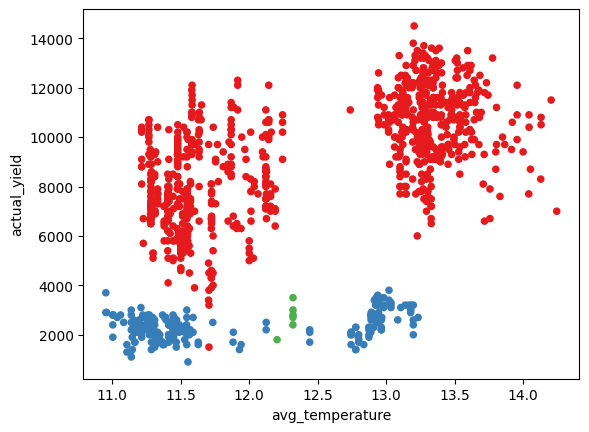

In [19]:
data.plot(x='avg_temperature', y='actual_yield', kind='scatter', c=data['crop_name'].map(color_dict))

<Axes: xlabel='avg_rainfall', ylabel='actual_yield'>

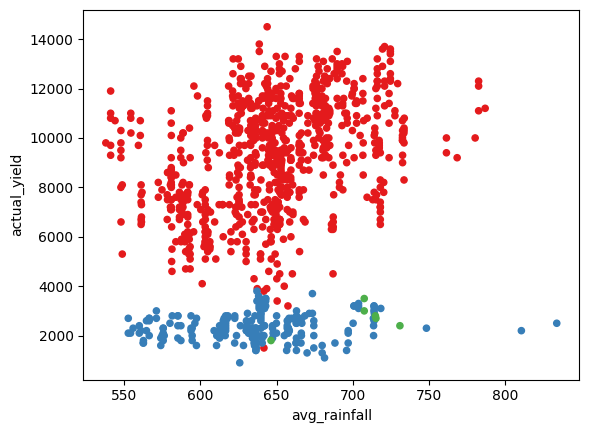

In [20]:
data.plot(x='avg_rainfall', y='actual_yield', kind='scatter', c=data['crop_name'].map(color_dict))

In [22]:
data.to_file('../resourses/updated_dataset.geojson',
             driver='GeoJSON')